## Importing Necessary Libraries

In [1]:
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

## Static Information

In [2]:
confirmed_global = 'data/time_series_covid19_confirmed_global.csv'
deaths_global = 'data/time_series_covid19_deaths_global.csv'
recovered_global = 'data/time_series_covid19_recovered_global.csv'

## Helper functions needed

In [3]:
def import_data(path):
    df = pd.read_csv(path)
    return df 

In [4]:
def create_monthly_analysis(df):
    years = ['20','21','22']
    months_mapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    century = '20'
    months = [i for i in range(1,13)]
    static_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
    date_columns = [j for j in df.columns if j not in static_columns]
    df_months = df.copy()
    # df_months['tilldate'] = 0
    for year in years:
        for month in months:
            date_month = str(month)+'/'+str(year)
            str_date_month = months_mapping[month] + ' ' +str(century)+str(year)
            df_months[str_date_month] = 0
            for i in df_months.columns:
                datematch = rf"{month}/\d{{1,2}}/{year}"
                date = re.compile(datematch)
                matched = date.search(str(i))
                if matched != None:
                    df_months[str_date_month] = df_months[i].astype(int) + df_months[str_date_month]
            # df_months['tilldate'] = df_months[date_month] + df_months['tilldate']
    df_months = df_months.drop(columns = date_columns, axis = 1)
    df_countries = df_months['Country/Region']
    stale_columns = ['Apr 2022','May 2022','Jun 2022','Jul 2022','Aug 2022','Sep 2022','Oct 2022','Nov 2022','Dec 2022', 'Province/State', 'Lat', 'Long']
    # stale_columns = ['Apr 2022','May 2022','Jun 2022','Jul 2022','Aug 2022','Sep 2022','Oct 2022','Nov 2022','Dec 2022', 'Lat', 'Long']
    # stale_columns =  ['Province/State', 'Lat', 'Long']
    df_months = df_months.drop(columns = stale_columns, axis = 1)
    df_months = df_months.set_index('Country/Region')
    #Total sum per row: 
    df_months.loc['global',:]= df_months.sum(axis=0)
    #Total sum per row: 
    df_months.loc[:,'tilldate'] = df_months.sum(axis=1)
    # df_months['Country/Region'] = df_countries
    return df_months

In [48]:
def plot_line_graph(x,y,title,xlabel,ylabel, color='blue', rotation=90, subplot_num=None, axis = None, fillcolor='skyblue',figsize=(10,5)):
    # importing libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    
    if axis == None:
        figure, axis = plt.subplots(1, 1, figsize=figsize)
    if subplot_num != None:
        axis = axis[subplot_num]
    axis.plot(x, y, color =color)
    axis.set_title(title)
    plt.setp(axis.get_xticklabels(), rotation=rotation)
    plt.fill_between(x, y, alpha=0.4, color=fillcolor)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    current_values = plt.gca().get_yticks()
    axis.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in plt.gca().get_yticks()/1E6])
    plt.show()
 

In [272]:
def addlabels(inp_x, inp_y, axis, million_scale = True, orient='h'):
    if orient == 'h':
        x = inp_y
        y = inp_x
        for i in range(len(y)):
            if x[i] <= 10 :            
                x_pos = x[i] + 100
            else:
                x_pos = x[i]
            if million_scale:
                x_values = ['{:,.0f}'.format(i/1E6) + 'M' for i in x]
            else:
                x_values = [int(i) for i in x]
            axis.text(x_pos, i, x_values[i], ha = 'right')        
    else:
        for i in range(len(x)):
            if y[i] <= 10 :            
                y_pos = y[i] + 50
            else:
                y_pos = y[i]
            if million_scale:
                y_values = ['{:,.0f}'.format(x/1E6) + 'M' for x in y]
            else:
                y_values = [int(x) for x in y]
            axis.text(i, y_pos, y_values[i], ha = 'center')

In [250]:
def plot_bar_graph(x,y,title,xlabel,ylabel, color='blue', rotation=90, width = 0.8, axis =None, subplot_num=None, figsize=(10,5), million_scale = True, add_labels = True, orient='h'):
    if orient == 'h':
        # importing libraries
        import matplotlib.pyplot as plt    
        if axis == None:
            figure, axis = plt.subplots(1, 1, figsize=figsize)
        if subplot_num != None:
            axis = axis[subplot_num]
        axis.barh(y=x, width=y, color = color, height = width)
        axis.set_title(title)
        # plt.setp(axis.get_xticklabels(), rotation=rotation)
        axis.set_xlabel(xlabel)
        axis.set_ylabel(ylabel)
        current_values = plt.gca().get_xticks()
        if million_scale:
            axis.set_xticklabels(['{:,.0f}'.format(x) + 'M' for x in plt.gca().get_xticks()/1E6])
        else:
            axis.set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])
        if add_labels:
            addlabels(x, y, axis, million_scale, orient = orient)
        plt.show()
    else:
        # importing libraries
        import matplotlib.pyplot as plt
        import numpy as np
        import math

        if axis == None:
            figure, axis = plt.subplots(1, 1, figsize=figsize)
        if subplot_num != None:
            axis = axis[subplot_num]
        axis.bar(x, y, color = color, width = width)
        axis.set_title(title)
        plt.setp(axis.get_xticklabels(), rotation=rotation)
        axis.set_xlabel(xlabel)
        axis.set_ylabel(ylabel)
        current_values = plt.gca().get_yticks()
        if million_scale:
            axis.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in plt.gca().get_yticks()/1E6])
        else:
            axis.set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
        if add_labels:
            addlabels(x, y, axis, million_scale)
        plt.show()
    

## Loading Input Data

In [49]:
confirmed_df = import_data(confirmed_global)
deaths_df = import_data(deaths_global)
recovered_df = import_data(recovered_global)

## Creating monthly analysis for confirmed cases and deaths observed

In [50]:
confirmed_monthly = create_monthly_analysis(confirmed_df)
deaths_monthly = create_monthly_analysis(deaths_df)
recovered_monthly = create_monthly_analysis(recovered_df)

### Creating global time series data 

In [51]:
global_table = pd.DataFrame(columns = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020',
       'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020',
       'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021',
       'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021',
       'Jan 2022', 'Feb 2022', 'Mar 2022'])
global_table.loc['confirmed'] = confirmed_monthly.loc['global']
global_table.loc['deaths'] = deaths_monthly.loc['global']
global_table.loc['recoveries'] = recovered_monthly.loc['global']
global_table.head()

,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,...,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Jan 2022,Feb 2022,Mar 2022
confirmed,1.648720e+09,2.299324e+09,9095197.0,63566312.0,145038098.0,246692701.0,431675990.0,672051282.0,895460493.0,1.229538e+09,...,5.320074e+09,5.896146e+09,6.466674e+09,6.811819e+09,7.473037e+09,7.656678e+09,8.496019e+09,1.027559e+10,1.157139e+10,5.371252e+09
deaths,4.155258e+07,5.302418e+07,401575.0,4422694.0,10004663.0,13983464.0,19316987.0,25085170.0,29554145.0,3.587342e+07,...,1.147672e+08,1.266275e+08,1.356262e+08,1.398839e+08,1.518097e+08,1.534248e+08,1.654586e+08,1.721260e+08,1.633355e+08,7.205711e+07
recoveries,1.065637e+09,1.366132e+09,2705110.0,16314536.0,54100868.0,118880540.0,242238461.0,423525878.0,608664203.0,8.432717e+08,...,3.440040e+09,3.868309e+09,5.217530e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### PLotting the global trends 

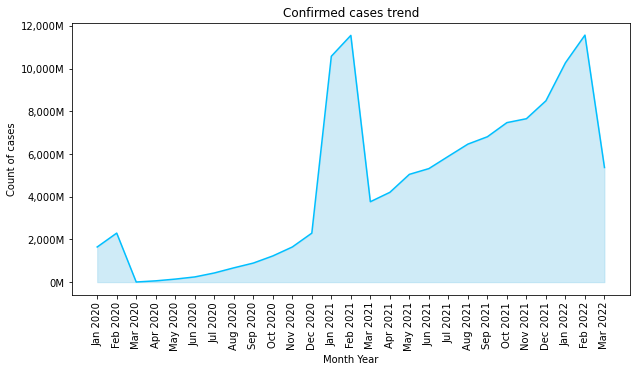

In [52]:
plot_line_graph(global_table.columns, global_table.loc['confirmed'].values.tolist(),'Confirmed cases trend', 'Month Year', 'Count of cases', color='deepskyblue', fillcolor='skyblue')

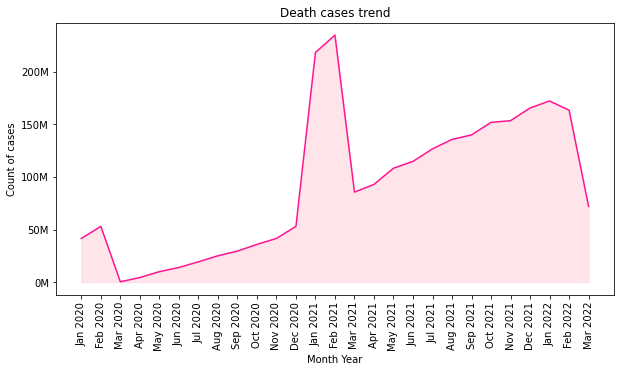

In [53]:
plot_line_graph(global_table.columns, global_table.loc['deaths'].values.tolist(),'Death cases trend', 'Month Year', 'Count of cases', color='deeppink', fillcolor='pink')

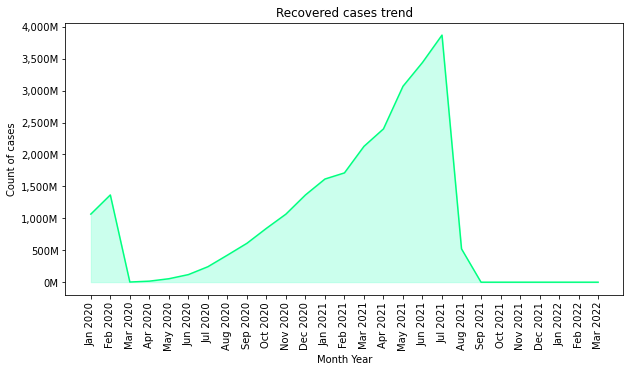

In [54]:
plot_line_graph(global_table.columns, global_table.loc['recoveries'].values.tolist(),'Recovered cases trend', 'Month Year', 'Count of cases', color='springgreen', fillcolor='turquoisemarine')

### Obtaining country wise summary figures

In [105]:
country_wise_total_df = pd.DataFrame(columns=['confirmed','deaths'])
# country_wise_total_df['rec'] = recovered_monthly['tilldate']
country_wise_total_df['confirmed'] = confirmed_monthly['tilldate']
country_wise_total_df['deaths'] = deaths_monthly['tilldate']
country_wise_total_df = country_wise_total_df.join(pd.DataFrame(recovered_monthly['tilldate']))
country_wise_total_df = country_wise_total_df.rename(columns={"tilldate":"recoveries"})
country_wise_total_df = country_wise_total_df.drop('global')
country_wise_total_df = country_wise_total_df.drop('Winter Olympics 2022')
country_wise_total_df = country_wise_total_df.drop('Summer Olympics 2020')
country_wise_total_df.head()

,confirmed,deaths,recoveries
Country/Region,,,
Afghanistan,72250685.0,3162879.0,20556405.0
Albania,87369182.0,1437660.0,23895960.0
Algeria,103242319.0,2929040.0,28946709.0
Andorra,9720770.0,83381.0,3438603.0
Angola,27928672.0,665886.0,6378643.0


#### Plotting top 5 most affected countries

In [106]:
top_affected_countries = (country_wise_total_df.groupby('Country/Region')['confirmed'].sum()).sort_values(ascending = False).head(10)

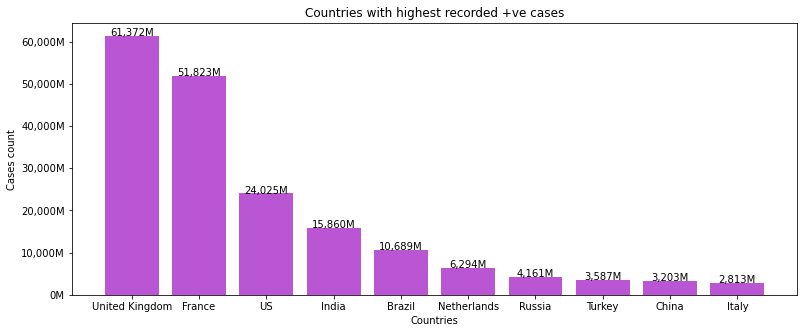

In [190]:
plot_bar_graph(top_affected_countries.index, top_affected_countries.values.tolist(), 'Countries with highest recorded +ve cases', 'Countries', 'Cases count', color='mediumorchid', rotation=0, width=0.8, figsize=(13,5))

#### Plotting top 5 least affected countries

In [169]:
least_affected_countries = (country_wise_total_df.groupby('Country/Region')['confirmed'].sum()).sort_values(ascending = True).head(10)

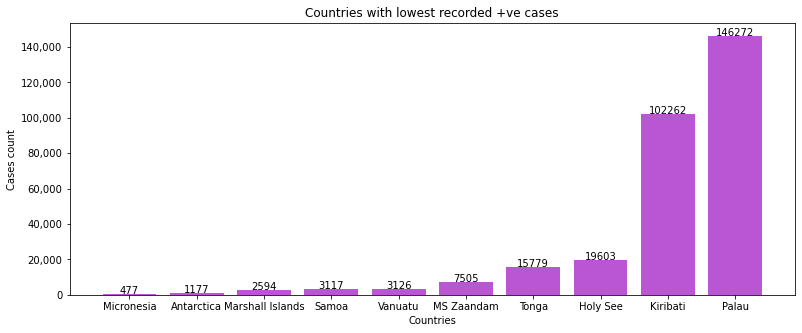

In [189]:
plot_bar_graph(least_affected_countries.index, least_affected_countries.values.tolist(), 'Countries with lowest recorded +ve cases', 'Countries', 'Cases count', color='mediumorchid', rotation=0, width=0.8, figsize=(13,5), million_scale=False)

#### Plotting top 5 countries with most casualities

In [178]:
top_deaths_countries = (country_wise_total_df.groupby('Country/Region')['deaths'].sum()).sort_values(ascending = False).head(10)

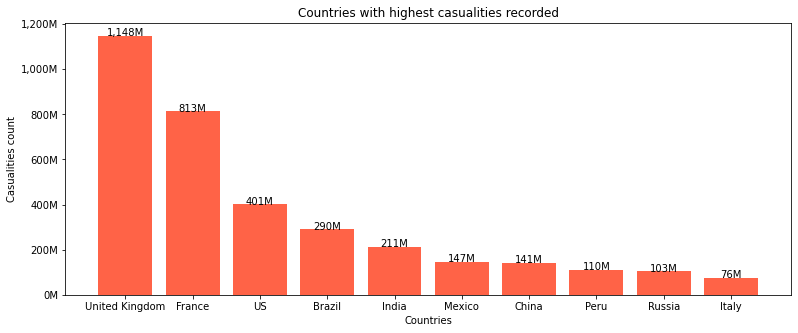

In [192]:
plot_bar_graph(top_deaths_countries.index, top_deaths_countries.values.tolist(), 'Countries with highest casualities recorded', 'Countries', 'Casualities count', color='tomato', rotation=0, width=0.8, figsize=(13,5))

#### Plotting top 5 least affected countries

In [173]:
least_deaths_countries = (country_wise_total_df.groupby('Country/Region')['deaths'].sum()).sort_values(ascending = True).head(10)

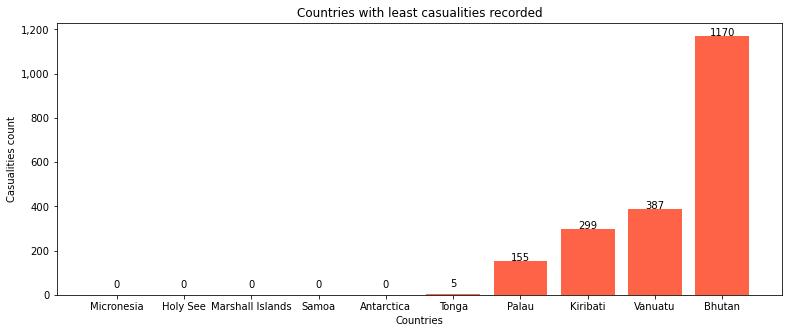

In [191]:
plot_bar_graph(least_deaths_countries.index, least_deaths_countries.values.tolist(), 'Countries with least casualities recorded', 'Countries', 'Casualities count', color='tomato', rotation=0, width=0.8, figsize=(13,5), million_scale=False)

#### Plotting top 10 fast recovering countries

In [266]:
top_recoveries_countries = (country_wise_total_df.groupby('Country/Region')['recoveries'].sum()).sort_values(ascending = False).head(10).sort_values(ascending = True)

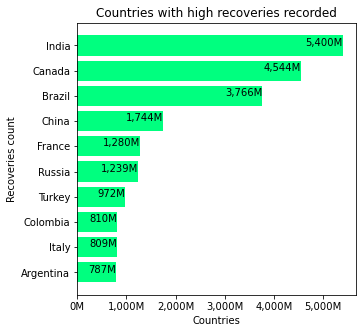

In [274]:
plot_bar_graph(top_recoveries_countries.index, top_recoveries_countries.values.tolist(), 'Countries with high recoveries recorded', 'Countries', 'Recoveries count', color='springgreen', width=0.8, figsize=(5,5), orient='h')

#### Plotting top 10 least recovering countries

In [268]:
least_recoveries_countries = (country_wise_total_df.groupby('Country/Region')['recoveries'].sum()).sort_values(ascending = True).head(10).sort_values(ascending = False)

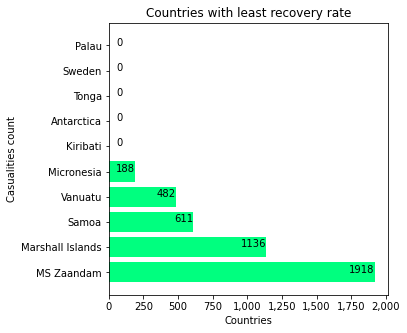

In [275]:
plot_bar_graph(least_recoveries_countries.index, least_recoveries_countries.values.tolist(), 'Countries with least recovery rate', 'Countries', 'Casualities count', color='springgreen', rotation=0, width=0.8, figsize=(5,5), million_scale=False, orient='h')

#### Checking the contribution of top countries in the entire worlds cases


In [288]:
recoveries=  country_wise_total_df.groupby('Country/Region')['recoveries'].sum()
deaths=  country_wise_total_df.groupby('Country/Region')['deaths'].sum()

confirms =  country_wise_total_df.groupby('Country/Region')['confirmed'].sum()

In [311]:
import numpy as np
np.percentile(recoveries, 70)

61205450.5

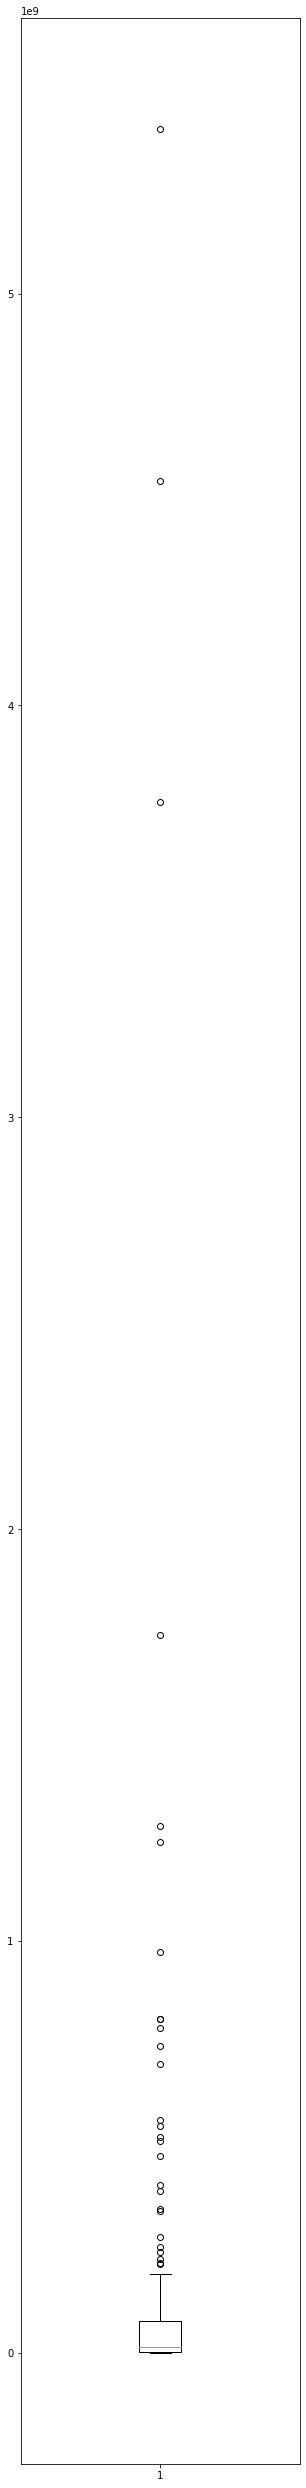

In [305]:
import matplotlib.pyplot as plt
## combine these different collections into a list
data_to_plot = [recoveries, deaths, confirms]

# Create a figure instance
fig = plt.figure(figsize=(5,45))

# Create an axes instance
# ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = plt.boxplot(recoveries)
plt.show()

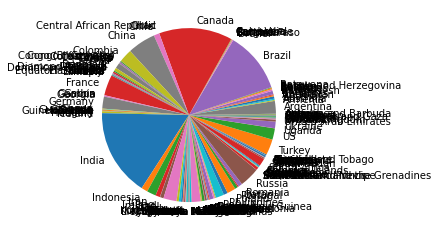

In [286]:
plt.pie(x = [int(i) for i in recoveries.values.tolist()], labels =recoveries.index)
plt.show()

In [278]:
recoveries.values.tolist()

[20556405.0,
 23895960.0,
 28946709.0,
 3438603.0,
 6378643.0,
 0.0,
 199901.0,
 787299219.0,
 57994061.0,
 81506688.0,
 144703494.0,
 74365574.0,
 2831468.0,
 53803146.0,
 214575486.0,
 708036.0,
 95590921.0,
 4110661.0,
 3210462.0,
 1893274.0,
 318312.0,
 77354150.0,
 39172905.0,
 10212459.0,
 3765908968.0,
 91666.0,
 72185319.0,
 3105106.0,
 38635411.0,
 285662.0,
 6304452.0,
 3679757.0,
 12286243.0,
 4544057216.0,
 1646977.0,
 1184113.0,
 348671560.0,
 1743655218.0,
 809757893.0,
 810357.0,
 2724332.0,
 7608891.0,
 61396671.0,
 13040049.0,
 77409288.0,
 24408125.0,
 5237082.0,
 343221039.0,
 186171987.0,
 381616.0,
 3328242.0,
 44818.0,
 69735671.0,
 99780122.0,
 57983836.0,
 19783090.0,
 2520020.0,
 830222.0,
 20275588.0,
 4540359.0,
 52912372.0,
 178477.0,
 12737472.0,
 1279843332.0,
 5820962.0,
 1671268.0,
 78579305.0,
 744063056.0,
 28967360.0,
 28045955.0,
 41443.0,
 64726724.0,
 6582577.0,
 1096635.0,
 3239179.0,
 4081143.0,
 7957.0,
 24643613.0,
 115439419.0,
 2367275.0,
 54